In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib3
import json
import requests
from pandas.io.json import json_normalize
from datetime import datetime
#Install Dependencies
import tensorflow as tf
from tensorflow import keras
import torch
import re
import nltk
from nltk.corpus import stopwords
from nltk import tokenize
from keras.preprocessing.text import Tokenizer


from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")


In [39]:
#pip install transformers

In [92]:
pip install yfinance

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.

In [40]:
news=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_11-12.2022.csv")

In [ ]:
index=pd.read_csv

In [41]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10000 non-null  int64 
 1   title         10000 non-null  object
 2   url           10000 non-null  object
 3   description   10000 non-null  object
 4   source        10000 non-null  object
 5   tickers       10000 non-null  object
 6   tags          10000 non-null  object
 7   published_at  10000 non-null  object
dtypes: int64(1), object(7)
memory usage: 625.1+ KB


In [42]:
news.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [43]:
print(news["description"].head(3))

0    Shares of Abiomed Inc. undefined rocketed 48.8...
1    Shares of Abiomed Inc. undefined rocketed 48.8...
2    Given their link to other risk-sensitive asset...
Name: description, dtype: object


In [44]:
news.tail(1)

,title,url,description,source,tickers,tags,published_at
9999,"Morgan Stanley stock falls Wednesday, underper...",https://www.marketwatch.com/story/morgan-stanl...,Shares of Morgan Stanley slid 2.38% to $90.50 ...,marketwatch.com,"['barl', 'djia', 'jpm', 'ms', 'msk', 'mwg', 'm...","['Djia', 'Dwitd', 'ETF', 'Financial Services',...",2022-12-14T22:11:00+00:00


In [45]:
news.isna().sum()

title           0
url             0
description     0
source          0
tickers         0
tags            0
published_at    0
dtype: int64

<AxesSubplot:xlabel='source', ylabel='count'>

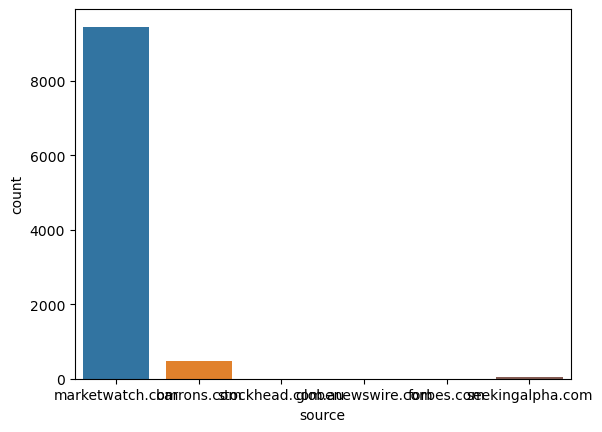

In [46]:
sns.countplot(data=news,x="source")

Test

In [47]:
tokens=tokenizer.encode("Morgan Stanley stock falls Wednesday",return_tensors="pt")
tokens

tensor([[ 101, 5253, 6156, 4518, 4212, 9317,  102]])

In [48]:
result=model(tokens)
result

SequenceClassifierOutput(loss=None, logits=tensor([[-1.7393,  2.3077,  0.1124]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [49]:
result.logits

tensor([[-1.7393,  2.3077,  0.1124]], grad_fn=<AddmmBackward0>)

In [50]:
# Position of the word with the strongest sentiment (0-4)
int(torch.argmax(result.logits))+1


2

                                                Apllying Model on tittles

In [52]:
def sentiment_score(text):
    tokens=tokenizer.encode(text,return_tensors="pt")
    result=model(tokens)
    return int(torch.argmax(result.logits))+1




In [54]:

news["sentiment_title"]=news["title"].apply(lambda x:sentiment_score(x[:512]))
#BERT (and many other transformer models) will consume 512 tokens max — truncating anything beyond this length

In [58]:
news["sentiment_description"]=news["description"].apply(lambda x:sentiment_score(x[:512]))

In [59]:
news.head(1)

,title,url,description,source,tickers,tags,published_at,sentiment_title,sentiment_description
0,Johnson & Johnson to buy Abiomed for $16.6 bil...,https://www.marketwatch.com/story/abiomed-stoc...,Shares of Abiomed Inc. undefined rocketed 48.8...,marketwatch.com,"['abmd', 'jnj', 'spx']","['Abmd', 'Article_Normal', 'Healthcare', 'Jnj'...",2022-11-01T09:37:35+00:00,3,1


<AxesSubplot:xlabel='sentiment_title', ylabel='count'>

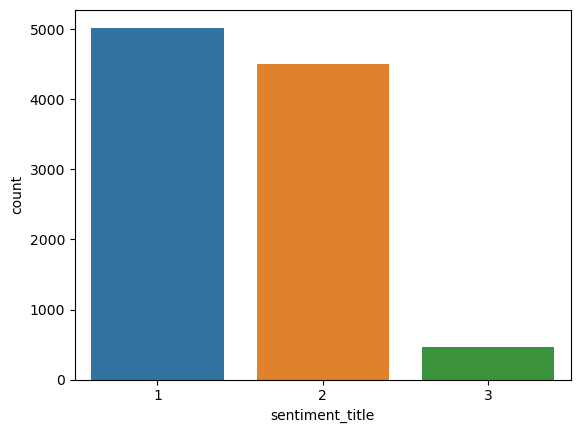

In [64]:
sns.countplot(data=news,x="sentiment_title")

<AxesSubplot:xlabel='sentiment_description', ylabel='count'>

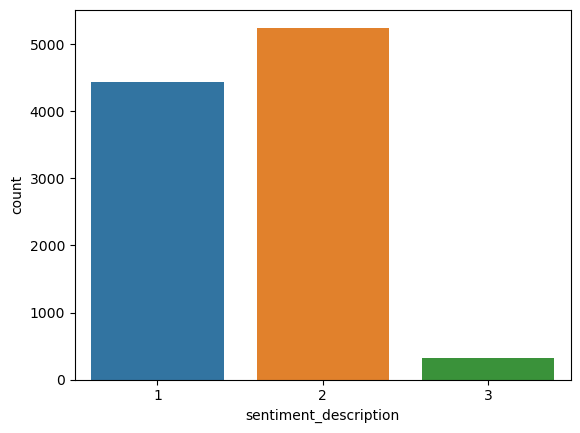

In [65]:
sns.countplot(data=news,x="sentiment_description")

<AxesSubplot:xlabel='sentiment_title', ylabel='sentiment_description'>

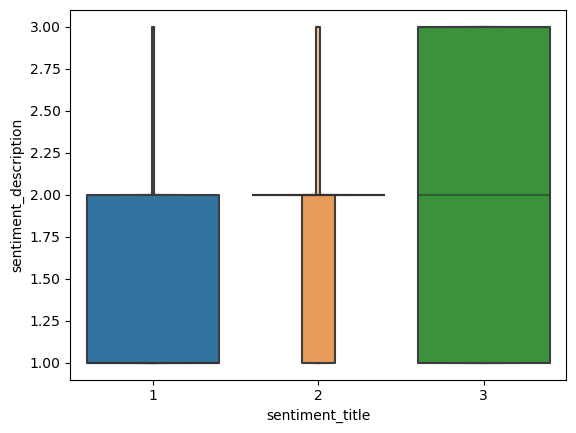

In [62]:
sns.boxenplot(data=news,x="sentiment_title",y="sentiment_description")

In [60]:
news.to_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full.csv")

In [66]:
news.tail(1)

,title,url,description,source,tickers,tags,published_at,sentiment_title,sentiment_description
9999,"Morgan Stanley stock falls Wednesday, underper...",https://www.marketwatch.com/story/morgan-stanl...,Shares of Morgan Stanley slid 2.38% to $90.50 ...,marketwatch.com,"['barl', 'djia', 'jpm', 'ms', 'msk', 'mwg', 'm...","['Djia', 'Dwitd', 'ETF', 'Financial Services',...",2022-12-14T22:11:00+00:00,2,2


In [68]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   title                  10000 non-null  object
 1   url                    10000 non-null  object
 2   description            10000 non-null  object
 3   source                 10000 non-null  object
 4   tickers                10000 non-null  object
 5   tags                   10000 non-null  object
 6   published_at           10000 non-null  object
 7   sentiment_title        10000 non-null  int64 
 8   sentiment_description  10000 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 703.2+ KB


In [ ]:
news["date"]=news["date"]

In [73]:
news["date"]=pd.to_datetime(news["published_at"]).dt.date
#news["date"]=news["date"].da

In [89]:
grouped_news=news.loc[:,["date","sentiment_title","sentiment_description"]].groupby(by="date",axis=0,dropna=True,as_index=True).mean()

In [90]:
grouped_news.head()

,sentiment_title,sentiment_description
date,,
2022-11-01,1.800000,1.646154
2022-11-02,1.911765,1.926471
2022-11-03,1.916667,1.816667
2022-11-04,1.843137,1.607843
2022-11-05,2.000000,2.000000


<AxesSubplot:xlabel='date'>

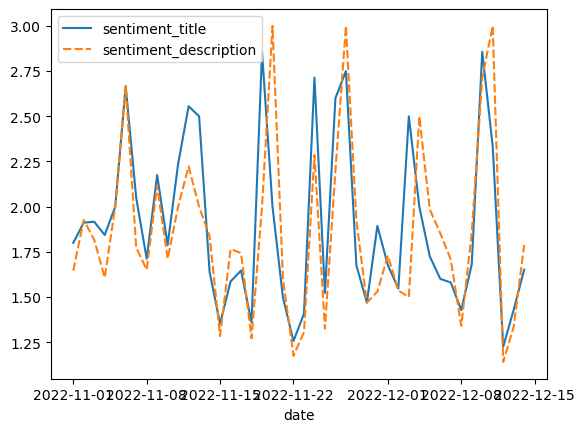

In [91]:
sns.lineplot(data=grouped_news)

                                                                                    Apllying Model (Kagle)

In [ ]:
#Keras Pretrained Models
model_kaggle = keras.models.load_model("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/KaggleModel.h5")

2023-02-09 16:13:11.803720: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model_kaggle.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 20)            233680    
                                                                 
 lstm (LSTM)                 (None, 50)                14200     
                                                                 
 dense (Dense)               (None, 3)                 153       
                                                                 
Total params: 248,033
Trainable params: 248,033
Non-trainable params: 0
_________________________________________________________________


Encode 

In [ ]:
tokenizer=Tokenizer(num_words=None, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

In [ ]:
test_message=["Morgan Stanley stock falls Wednesday"]
test=tokenizer.texts_to_sequences(test_message)
print(test)

[[]]


In [ ]:
tokenizer

In [ ]:
test

[[]]